In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

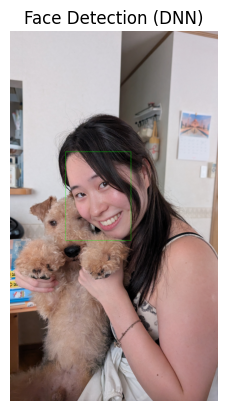

In [18]:
img = cv2.imread('assets/momo.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plt.imshow(img_rgb)
# plt.axis('off')
# plt.title('Original Image')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray, cmap='gray')
# plt.axis('off')
# plt.title('Grayscale Image')

# blur = cv2.GaussianBlur(gray, (3, 3), 0)
# plt.imshow(blur, cmap='gray')
# plt.axis('off')
# plt.title('Blurred Image')

# edges = cv2.Canny(blur, 50, 150)
# plt.imshow(edges, cmap='gray')
# plt.axis('off')
# plt.title('Edge Detection')

net = cv2.dnn.readNetFromCaffe('assets/deploy.prototxt', 'assets/res10_300x300_ssd_iter_140000.caffemodel')
(h,w) = img.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0,
                             (300, 300), (104.0, 177.0, 123.0))
net.setInput(blob)
detections = net.forward()

for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Face Detection (DNN)')
plt.show()